## Importing libraries


In [2]:
%matplotlib inline  
 
import os
import numpy as np
import tensorflow as tf

from PIL import Image
from matplotlib import pyplot as plt

print('Using Tensorflow', tf.__version__)

Using Tensorflow 2.3.0


**rotation**


In [3]:
generator =  tf.keras.preprocessing.image.ImageDataGenerator( rotation_range = 40 )

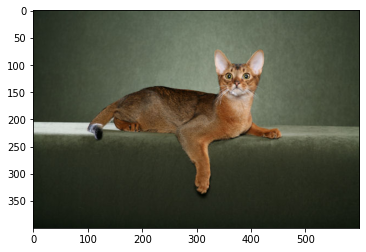

In [9]:
image_path = "/content/sample_data/Image/cat.jpg"

plt.imshow(plt.imread(image_path));

Found 1 images belonging to 2 classes.


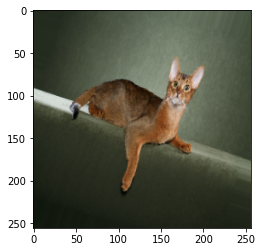

In [10]:
x,y = next(generator.flow_from_directory('sample_data',batch_size=1))
plt.imshow(x[0].astype('uint8'))

**Width and height shift**


In [11]:
generator1 = tf.keras.preprocessing.image.ImageDataGenerator( width_shift_range = [-100, -50, 0, 50, 100], height_shift_range= [-50, 0, 50])

Found 1 images belonging to 2 classes.


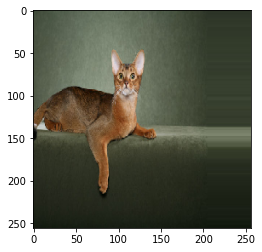

In [12]:
x,y = next(generator1.flow_from_directory('sample_data', batch_size = 1))
plt.imshow(x[0].astype('uint8'))

**Brightness**


Found 1 images belonging to 2 classes.


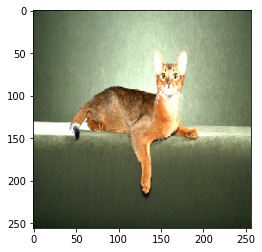

In [13]:
generator3 = tf.keras.preprocessing.image.ImageDataGenerator(brightness_range=(0.5,2.))

x ,y = next(generator3.flow_from_directory('sample_data', batch_size=1))
plt.imshow(x[0].astype('uint8'))

**Zoom**

Found 1 images belonging to 2 classes.


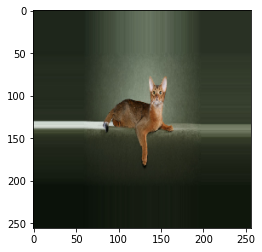

In [14]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(zoom_range=(0.5,2.5))
x, y = next(generator.flow_from_directory('sample_data',batch_size = 1))
plt.imshow(x[0].astype('uint8'))

**Shear transformations**

Found 1 images belonging to 2 classes.


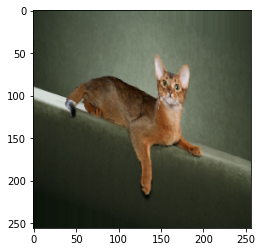

In [15]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(shear_range = 40)
x,y = next(generator.flow_from_directory('sample_data',batch_size=1))
plt.imshow(x[0].astype('uint8'))

**Channel shift**

Found 1 images belonging to 2 classes.


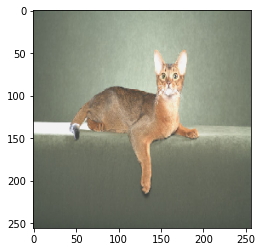

In [16]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(channel_shift_range=100)
x,y = next(generator.flow_from_directory('sample_data', batch_size=1))
plt.imshow(x[0].astype('uint8'))

In [17]:
x.mean()

129.41064

In [18]:
np.array(Image.open(image_path)).mean()

69.57810416666666

**Vertical and horizontal shift**


Found 1 images belonging to 2 classes.


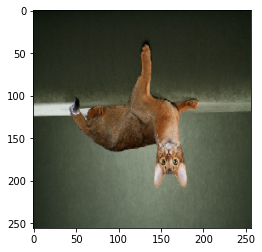

In [19]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
x,y = next(generator.flow_from_directory('sample_data', batch_size = 1))
plt.imshow(x[0].astype('uint8'))



## Data Normalization

**Feature wise**

In [20]:
(x_train, y_train),(x_test,y_test) = tf.keras.datasets.cifar10.load_data()

generator = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center = True,
    featurewise_std_normalization = True
)

generator.fit(x_train)

170500096/170498071 [==============================] - 3s 0us/step


In [21]:
x, y = next(generator.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(),y)
print(x_train.mean())

-0.14834568 0.7086657 [[6]]
120.70756512369792


**sample wise**

In [22]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(samplewise_center = True,
                                                           samplewise_std_normalization = True)

x, y = next(generator.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(), y)

0.0 1.0 [[2]]


## Rescale and Preprocessing Function

In [23]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1.,preprocessing_function = tf.keras.applications.mobilenet_v2.preprocess_input)

In [25]:
x, y = next(generator.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(), y)

0.61848706 0.39528862 [[0]]


## Using in Model Training

In [26]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function = tf.keras.applications.mobilenet_v2.preprocess_input,
                                                           horizontal_flip = True,rotation_range  = 20)



In [27]:
model = tf.keras.models.Sequential([tf.keras.applications.mobilenet_v2.MobileNetV2(include_top = False,
                                                                                   input_shape = (224, 224, 3),
                                                                                   pooling = 'avg'),tf.keras.layers.Dense(10,activation = 'softmax')])

model.compile(loss = 'sparse_categorical_crossentropy', 
              optimizer = 'adam',
              metrics = ['accuracy'])

9412608/9406464 [==============================] - 0s 0us/step


In [28]:
_ = model.fit(generator.flow(x_train,
                             y_train,
                             batch_size = 32),
             epochs = 1,
             steps_per_epoch = 10)

10/10 [==============================] - 2s 241ms/step - loss: 3.0695 - accuracy: 0.1156
